1/1 [==============================] - 0s 363ms/step


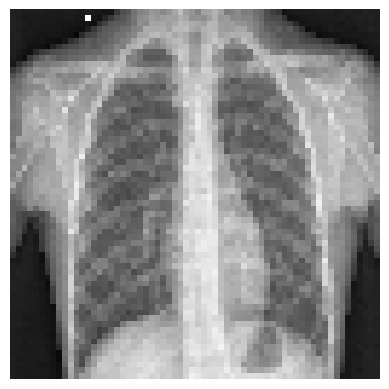

A probabilidade de pneumonia é de: 0.00%


In [ ]:
import numpy as np  # Importa a biblioteca NumPy e a renomeia como np para facilitar o acesso aos seus métodos.
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para visualização de dados e a renomeia como plt.
import warnings  # Importa a biblioteca de avisos do Python para manipular avisos durante a execução do código.
import PIL  # Importa o módulo PIL (Python Imaging Library) para manipulação de imagens.
import tensorflow as tf  # Importa a biblioteca TensorFlow para aprendizado de máquina e deep learning.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importa a classe ImageDataGenerator do TensorFlow para pré-processamento de imagens.
from tensorflow.keras.applications import VGG16  # Importa a arquitetura de rede neural pré-treinada VGG16 do TensorFlow.
from tensorflow.keras.models import Model  # Importa a classe Model do TensorFlow para construir e manipular modelos de redes neurais.


def predict_pneumonia(image_path, model):
    # Carrega a imagem e pré-processa
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realiza a previsão
    prediction = model.predict(img_array)

    # Exibi a imagem
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Interpreta a previsão
    pneumonia_prob = prediction[0][0]
    print('A probabilidade de pneumonia é de: {:.2f}%'.format(pneumonia_prob * 100))

# Carrega dados
test_dir = '/content/drive/MyDrive/raio-x-torax/teste'

# Carrega o modelo pré-treinado (VGG16) e remove a camada de saída
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Adiciona camadas adicionais ao modelo
x = base_model.output
x = tf.keras.layers.Flatten()(x) # transforma os dados da última camada convolucional ou de pooling do modelo base em um vetor unidimensional
x = tf.keras.layers.Dense(256, activation='relu')(x) # Comumente usada para processar a saída da camada de achatamento e realizar aprendizado de características mais abstratas.
x = tf.keras.layers.Dropout(0.5)(x) # Força a rede a aprender características de forma mais robusta e geral.
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Combina o modelo base com as camadas adicionais
model = Model(inputs=base_model.input, outputs=predictions)

# Carrega os pesos do modelo treinado
model.load_weights('/content/drive/MyDrive/model_weights.h5')

# Caminho da imagem para análise
image_path = '/content/drive/MyDrive/raio-x-torax/teste/normal/IM-0001-0001.jpeg'

# Chama a função para fazer previsões na imagem específica
predict_pneumonia(image_path, model)
